In [1]:
import torch
import torchvision

In [2]:
my_transform = torchvision.transforms.ToTensor()

In [4]:
train_dataset = torchvision.datasets.FashionMNIST(train=True, download=False,root='data', transform=my_transform)
test_dataset = torchvision.datasets.FashionMNIST(train=False, download=False, root='data', transform=my_transform)

In [5]:
train_iter = torch.utils.data.DataLoader(train_dataset, batch_size=256, shuffle=True)
test_iter = torch.utils.data.DataLoader(test_dataset, batch_size=256, shuffle=True)

In [6]:
loss = torch.nn.CrossEntropyLoss()

In [9]:
net = torch.nn.Sequential(torch.nn.Flatten(), torch.nn.Linear(784,256), torch.nn.ReLU(), torch.nn.Linear(256,10))

In [11]:
def init_weights(m):
    if type(m) == torch.nn.Linear:
        torch.nn.init.normal_(m.weight, std=0.01)
        
net.apply(init_weights)

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=256, bias=True)
  (2): ReLU()
  (3): Linear(in_features=256, out_features=10, bias=True)
)

In [12]:
optimizer = torch.optim.SGD(net.parameters(),lr=0.01)

In [13]:
def train_epoch(net, train_iter, num_epochs, loss):
    for epoch in range(num_epochs):
        for X, y in train_iter:
            y_hat = net(X)
            l = loss(y_hat, y)
            optimizer.zero_grad()
            l.backward()
            optimizer.step()
        
        print(f"For  {epoch}, loss :{l} ")

In [14]:
train_epoch(net, train_iter, 5, loss)

For  0, loss :1.874240517616272 
For  1, loss :1.3036627769470215 
For  2, loss :1.0698219537734985 
For  3, loss :0.8804893493652344 
For  4, loss :0.7858079075813293 


tensor(7) tensor([1])


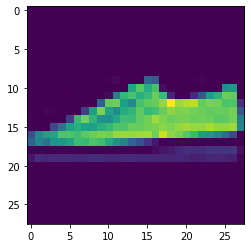

In [30]:
import matplotlib.pyplot as plt

def predict_one(test_iter):
    for X, y in test_iter:
        y_hat = net(X[0]).argmax(1)
        plt.imshow(X[0].permute(1,2,0))
        print(y[0], y_hat)
        break
        
predict_one(test_iter)

### Exercises

1. Try adding different numbers of hidden layers (you may also modify the learning rate). What
setting works best?
2. Try out different activation functions. Which one works best?
3. Try different schemes for initializing the weights. What method works best?

In [18]:
#1 
import torch.nn as nn

net = nn.Sequential(
        nn.Flatten(),
        nn.Linear(784,256),
        nn.ReLU(),
        nn.Linear(256,64),
        nn.ReLU(),
        nn.Linear(64,10)
    )

In [19]:
#3

#intialising the weights to zero

def init_weight_to_zero(m):
    if type(m) == nn.Linear:
#         nn.init.normal_(m.weight, std=0.1)
        nn.init.zeros_(m.weight)

In [20]:
net.apply(init_weight_to_zero)

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=256, bias=True)
  (2): ReLU()
  (3): Linear(in_features=256, out_features=64, bias=True)
  (4): ReLU()
  (5): Linear(in_features=64, out_features=10, bias=True)
)

In [27]:
for X in net.parameters():
    print(X)

Parameter containing:
tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]], requires_grad=True)
Parameter containing:
tensor([ 2.7088e-02,  2.4825e-03,  7.1099e-03, -8.0640e-04,  3.3403e-02,
         3.4258e-02,  1.9895e-02,  5.0261e-03,  1.7940e-02,  3.2622e-02,
         3.0682e-02,  2.3643e-04, -1.5638e-02, -2.1498e-02, -1.5477e-02,
         4.6876e-03,  2.1176e-02, -3.4443e-02, -3.5599e-03, -2.2955e-02,
         2.9787e-02, -1.4461e-02,  1.0629e-02,  1.2817e-02,  1.0149e-02,
        -7.5140e-04,  3.4496e-02,  2.2141e-02, -3.2468e-02,  3.3399e-02,
         1.0779e-02, -2.3181e-02, -1.3938e-02, -9.4698e-03, -2.2919e-03,
        -7.6109e-03,  1.0059e-02,  1.1487e-02,  2.4636e-02,  3.1517e-02,
        -1.6581e-03,  1.0538e-02,  8.1604e-03,  2.9261e-02,  1.3604e-02,
        -3.1902e-02, -2.8

In [28]:
# 2

optimizer = torch.optim.Adam(net.parameters(), lr=0.01)

In [29]:
train_epoch(net,train_iter, 5, loss)

For  0, loss :2.3007898330688477 
For  1, loss :2.3061273097991943 
For  2, loss :2.302044630050659 
For  3, loss :2.3053929805755615 
For  4, loss :2.3035728931427 


tensor(2) tensor([1])


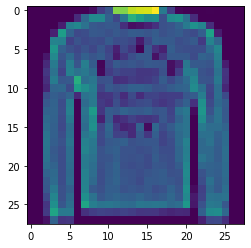

In [31]:
predict_one(test_iter)

# not working

In [32]:
# change optimizer to SGD

optimizer = torch.optim.SGD(net.parameters(), lr=0.01)

In [33]:
train_epoch(net, train_iter, 5, loss)

For  0, loss :2.301443576812744 
For  1, loss :2.3033292293548584 
For  2, loss :2.303032636642456 
For  3, loss :2.3033034801483154 
For  4, loss :2.3025643825531006 


In [34]:
# lets put the weights back to normal distribution and try

net.apply(init_weights)

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=256, bias=True)
  (2): ReLU()
  (3): Linear(in_features=256, out_features=64, bias=True)
  (4): ReLU()
  (5): Linear(in_features=64, out_features=10, bias=True)
)

In [36]:
# lr back to 0.1

optimizer = torch.optim.SGD(net.parameters(), lr=0.1)

In [37]:
train_epoch(net, train_iter, 5, loss)

# working now.

For  0, loss :1.5098479986190796 
For  1, loss :0.8497960567474365 
For  2, loss :0.8070051074028015 
For  3, loss :0.6060378551483154 
For  4, loss :0.4382920265197754 


tensor(3) tensor([3])


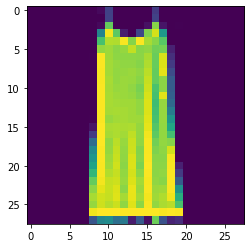

In [38]:
predict_one(test_iter)